<a href="https://colab.research.google.com/github/HanifeOruc/Breast-Cancer-Dataset/blob/main/250608_BSBI_INTRODUCTION_TO_AI_Practical_Assignment_Hanife_Oruc_Feb_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Exploration:

## 1.1. Investigate the distribution of the target variable (Malignant vs. Benign):

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

<ipython-input-1-ce660d1be0f8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


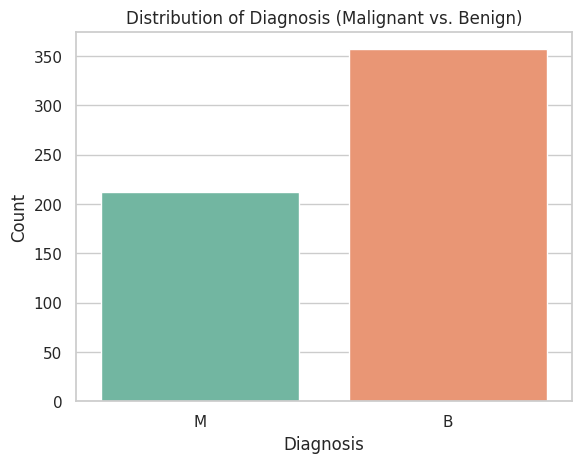

In [ ]:
import pandas as pd # to import the data with url:

df = pd.read_csv("https://raw.githubusercontent.com/abdelDebug/Breast-Cancer-Dataset/refs/heads/main/breast_cancer_dataset.csv")
print(df.head())
print(df.info())
print(df['diagnosis'].value_counts())  # distribution of the target variable

# visualisation of the distribution of target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Distribution of Diagnosis (Malignant vs. Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

Here we see that the distribution is 357 for Benign and 212 for Malignant. In the second section, the statistical status of the data set will be examined.

## 1.2. Generate basic statistics (mean, median, standard deviation) for numerical features:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Summarize descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

Shape of the DataFrame: (569, 32)

Descriptive Statistics:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799           

After reviewing the statistical values, we can process to the next step of controlling the outliers.

## 1.3. Create initial visualizations (histograms, box plots) to spot outliers or skew.

                         Outlier Count
area_se                             65
radius_se                           38
perimeter_se                        38
area_worst                          35
smoothness_se                       30
compactness_se                      28
fractal_dimension_se                28
symmetry_se                         27
area_mean                           25
fractal_dimension_worst             24
symmetry_worst                      23
concavity_se                        22
texture_se                          20
concave points_se                   19
concavity_mean                      18
radius_worst                        17
compactness_worst                   16
compactness_mean                    16
perimeter_worst                     15
symmetry_mean                       15
fractal_dimension_mean              15
radius_mean                         14
perimeter_mean                      13
concavity_worst                     12
concave points_mean      

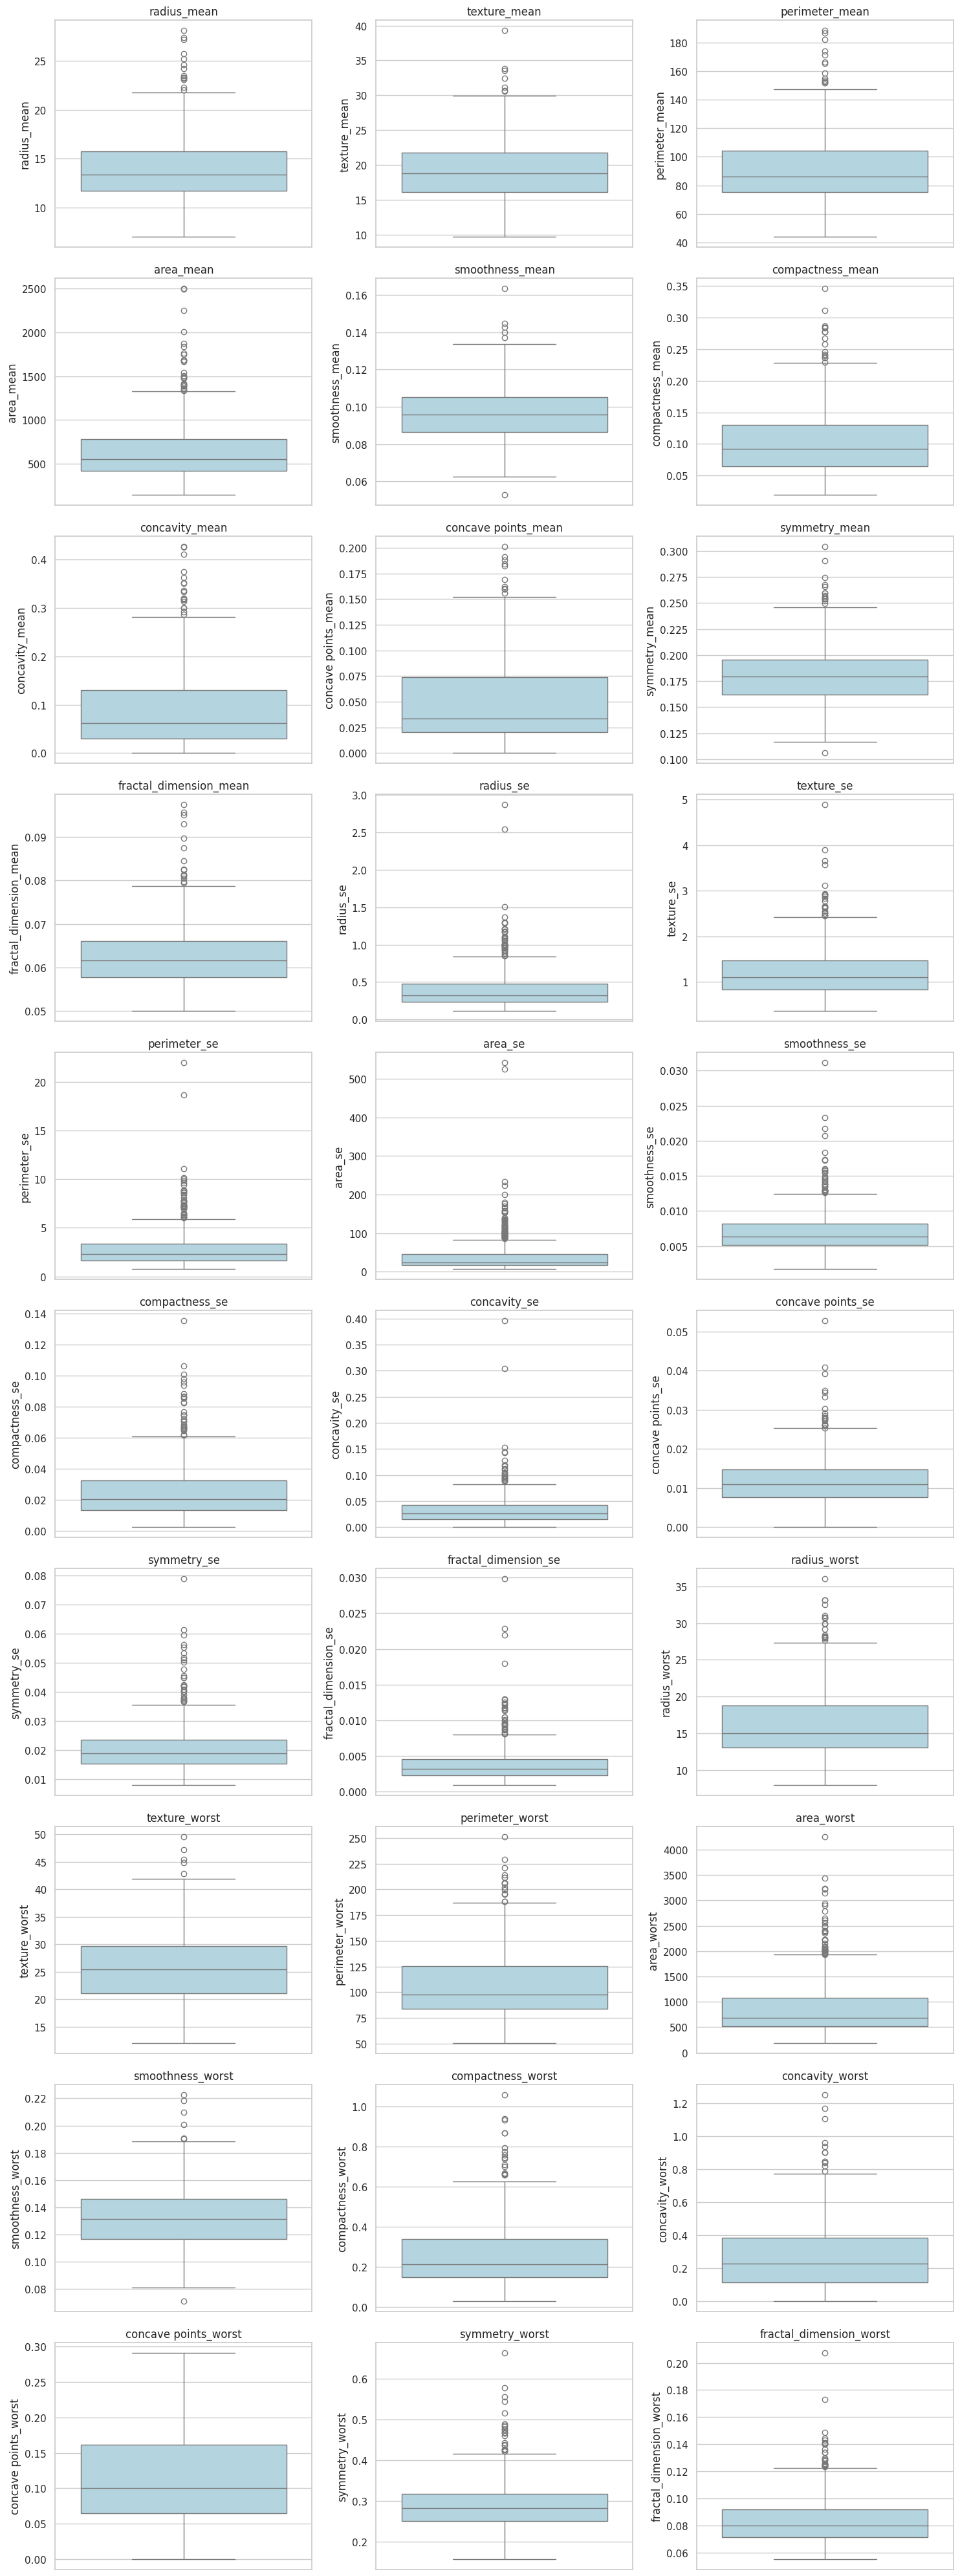

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Include numerical columns (drop 'id' column)
numerical_df = df.select_dtypes(include=[np.number]).drop(columns=['id'], errors='ignore')

# To count the numbers of outliers
def count_outliers(series):
    Q1, Q3 = series.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

# To include only the columns which has outliers
outlier_counts = numerical_df.apply(count_outliers)
outlier_df = outlier_counts[outlier_counts > 0].sort_values(ascending=False).to_frame(name='Outlier Count')

print(outlier_df)

# To visualize the outliers with Boxplot
cols = 3
rows = -(-len(numerical_df.columns) // cols)  # yukarı yuvarlama
plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(numerical_df.columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

We should also control if there is any data accumulation in the graphs with the skewness:

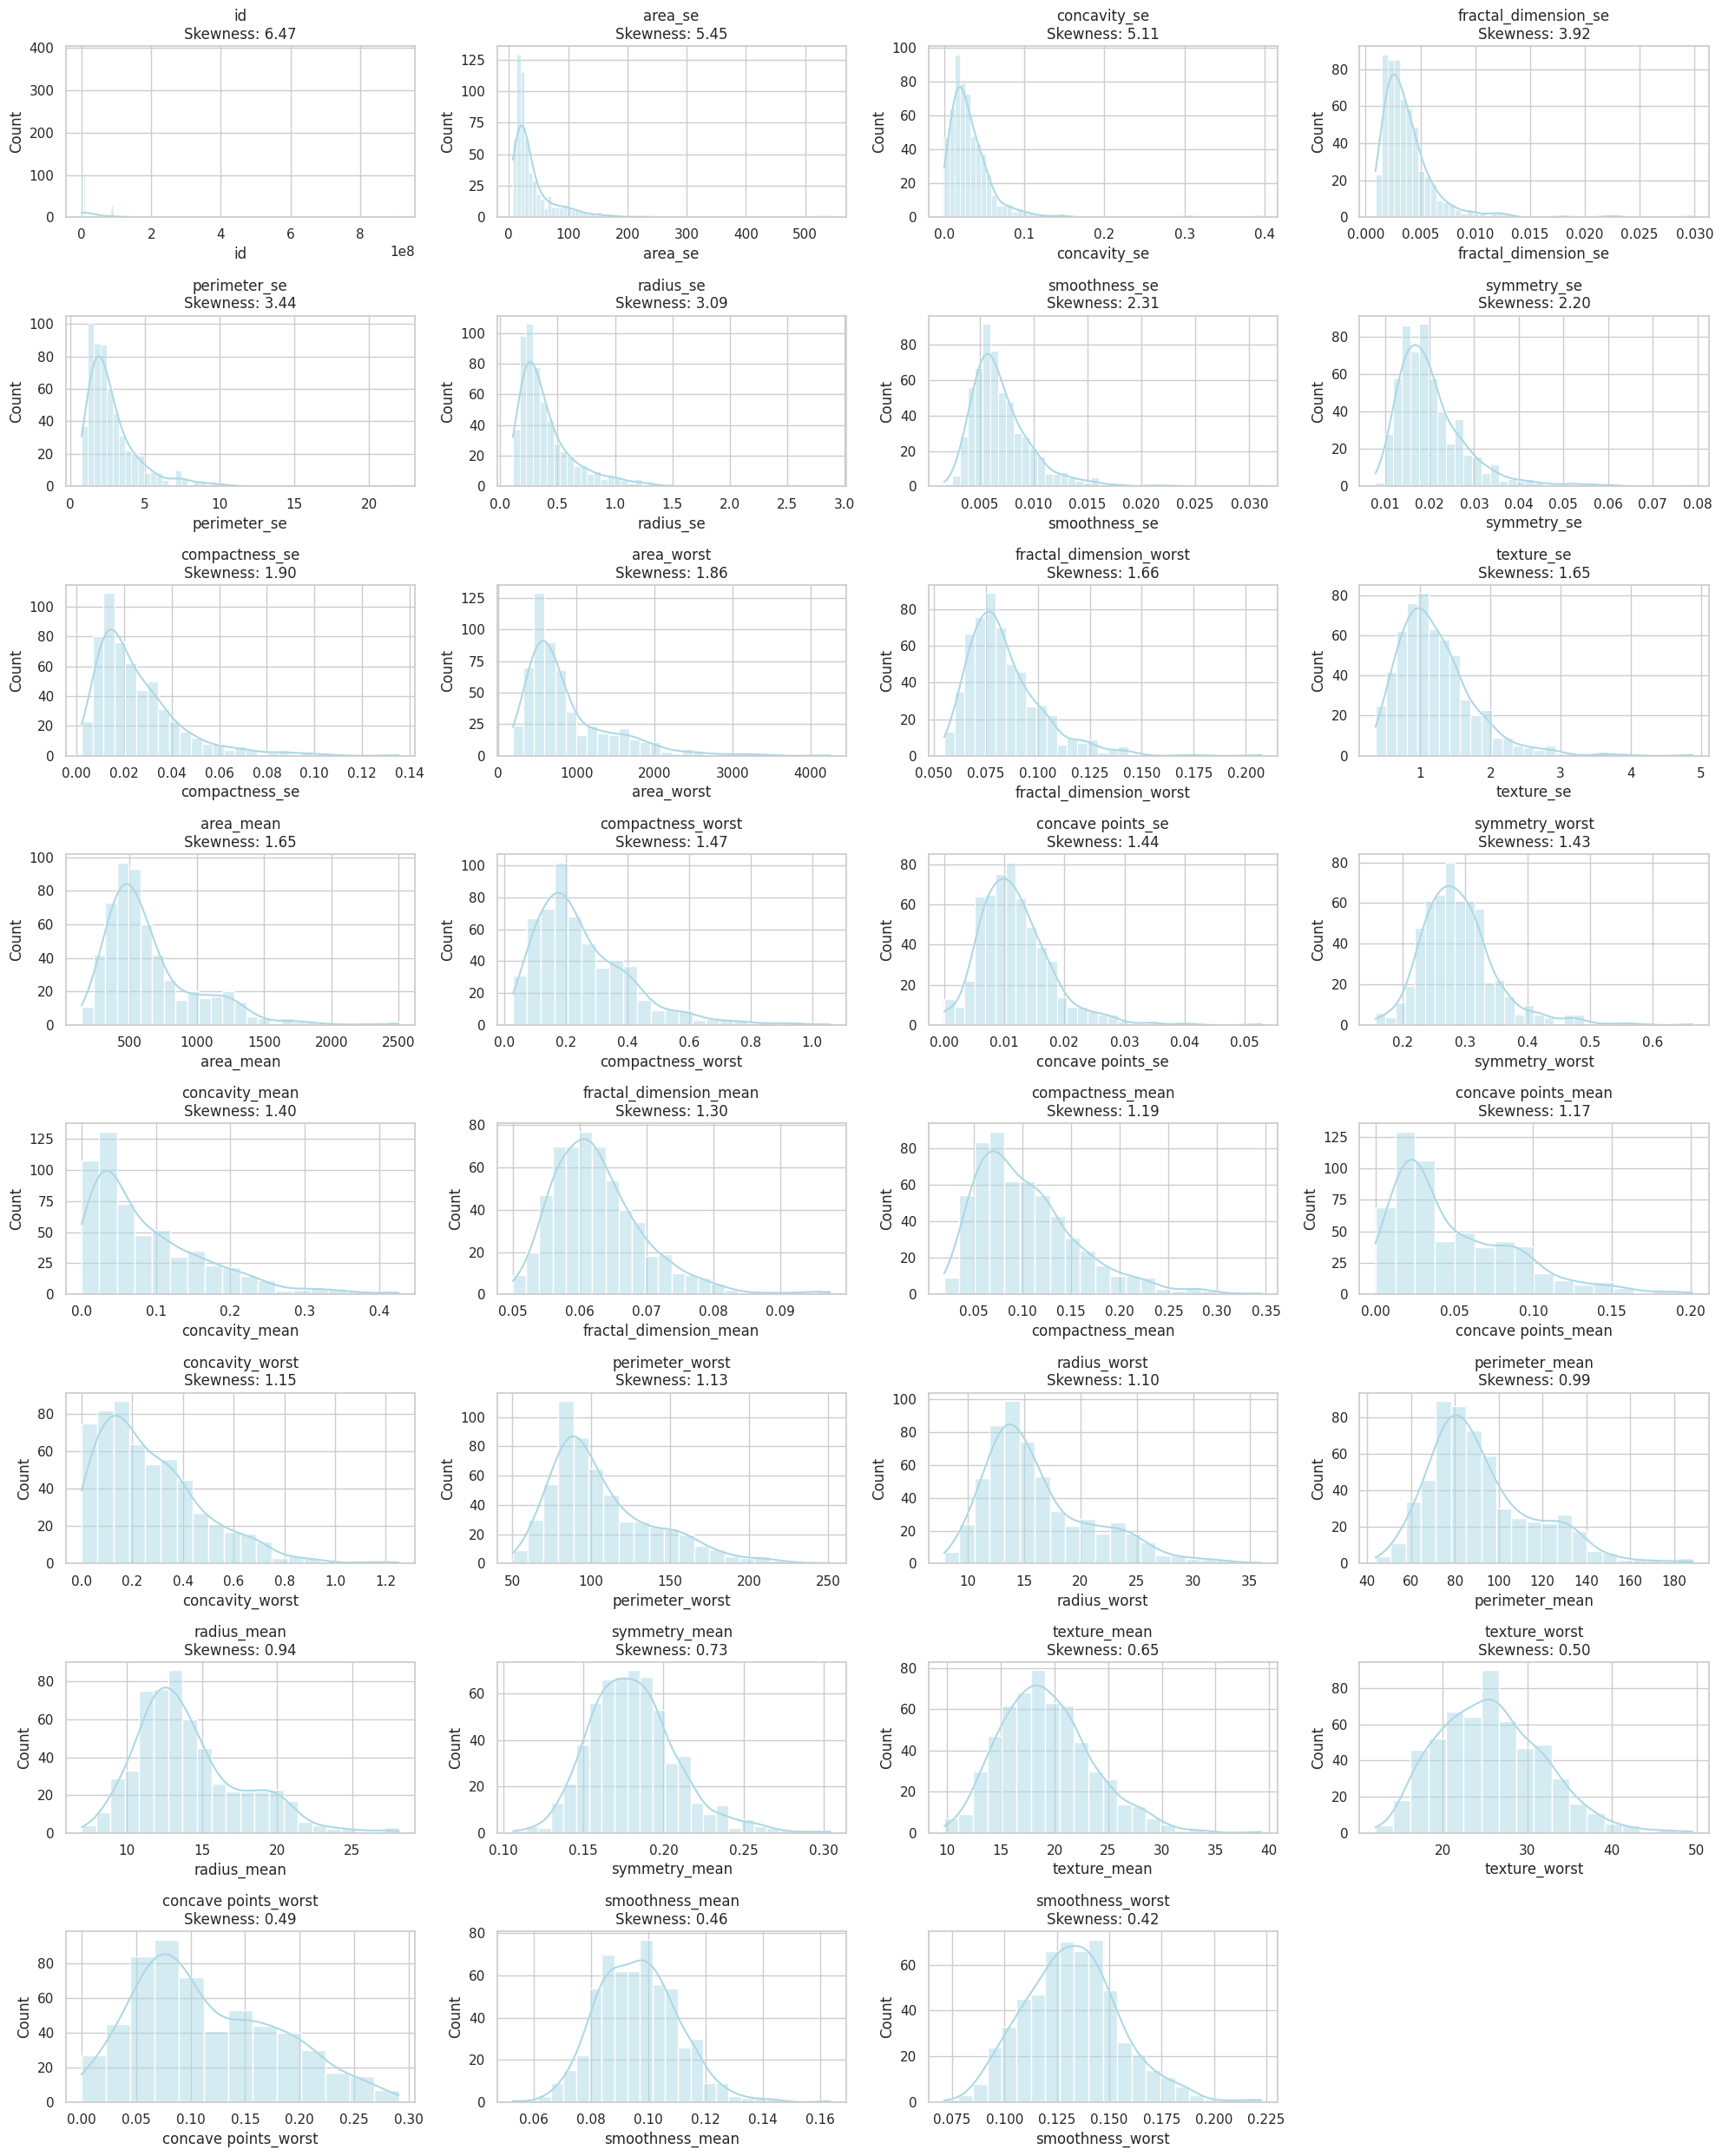

                         Skewness
id                       6.473752
area_se                  5.447186
concavity_se             5.110463
fractal_dimension_se     3.923969
perimeter_se             3.443615
radius_se                3.088612
smoothness_se            2.314450
symmetry_se              2.195133
compactness_se           1.902221
area_worst               1.859373
fractal_dimension_worst  1.662579
texture_se               1.646444
area_mean                1.645732
compactness_worst        1.473555
concave points_se        1.444678
symmetry_worst           1.433928
concavity_mean           1.401180
fractal_dimension_mean   1.304489
compactness_mean         1.190123
concave points_mean      1.171180
concavity_worst          1.150237
perimeter_worst          1.128164
radius_worst             1.103115
perimeter_mean           0.990650
radius_mean              0.942380
symmetry_mean            0.725609
texture_mean             0.650450
texture_worst            0.498321
concave points

In [ ]:
numerical_df = df.select_dtypes(include=[np.number])

import matplotlib.pyplot as plt
import seaborn as sns

skew_values = numerical_df.skew().sort_values(ascending=False)

# Visual: histogram + KDE
plt.figure(figsize=(20, 25))
for i, column in enumerate(skew_values.index):
    plt.subplot(8, 4, i+1)
    sns.histplot(numerical_df[column], kde=True, color='lightblue')
    plt.title(f"{column}\nSkewness: {skew_values[column]:.2f}")
    plt.tight_layout()

plt.show()

# To see the statistical values in a table with skewness
skew_table = pd.DataFrame(skew_values, columns=["Skewness"])
print(skew_table)

Values that are significant outliers from the mean and the 50th percentile data (Q1-Q3) will be adjusted using winsorizing to prevent distortion in statistical calculations and to ensure the model functions effectively.

In [ ]:
from scipy.stats.mstats import winsorize

df_winsorized = df.copy() #To keep the original dataset

numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['diagnosis'], errors='ignore')

for col in numerical_features:
    if col in df_winsorized.columns and pd.api.types.is_numeric_dtype(df_winsorized[col]):
          if col != 'diagnosis':
                df_winsorized[col] = df_winsorized[col].clip(lower=df_winsorized[col].quantile(0.05), upper=df_winsorized[col].quantile(0.95) )

cols_to_compare = ['area_se', 'radius_se', 'perimeter_se', 'area_worst', 'smoothness_se'] #Comparing to dataset after winsorizing
print("\n--- Original Dataset Statistics ---")
print(df[cols_to_compare].describe())
print("\n--- After winsorizing Dataset Statistics ---")
print(df_winsorized[cols_to_compare].describe())


--- Original Dataset Statistics ---
          area_se   radius_se  perimeter_se   area_worst  smoothness_se
count  569.000000  569.000000    569.000000   569.000000     569.000000
mean    40.337079    0.405172      2.866059   880.583128       0.007041
std     45.491006    0.277313      2.021855   569.356993       0.003003
min      6.802000    0.111500      0.757000   185.200000       0.001713
25%     17.850000    0.232400      1.606000   515.300000       0.005169
50%     24.530000    0.324200      2.287000   686.500000       0.006380
75%     45.190000    0.478900      3.357000  1084.000000       0.008146
max    542.200000    2.873000     21.980000  4254.000000       0.031130

--- After winsorizing Dataset Statistics ---
          area_se   radius_se  perimeter_se   area_worst  smoothness_se
count  569.000000  569.000000    569.000000   569.000000     569.000000
mean    37.362197    0.392406      2.766186   856.307452       0.006899
std     29.590101    0.218498      1.551605   482.285

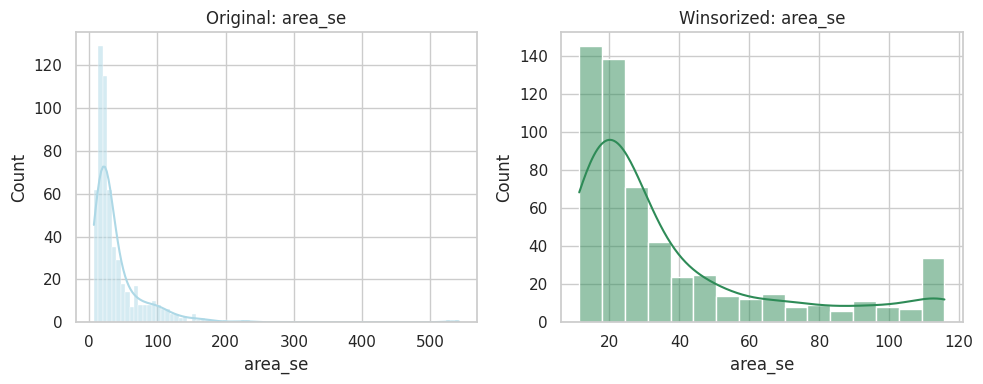

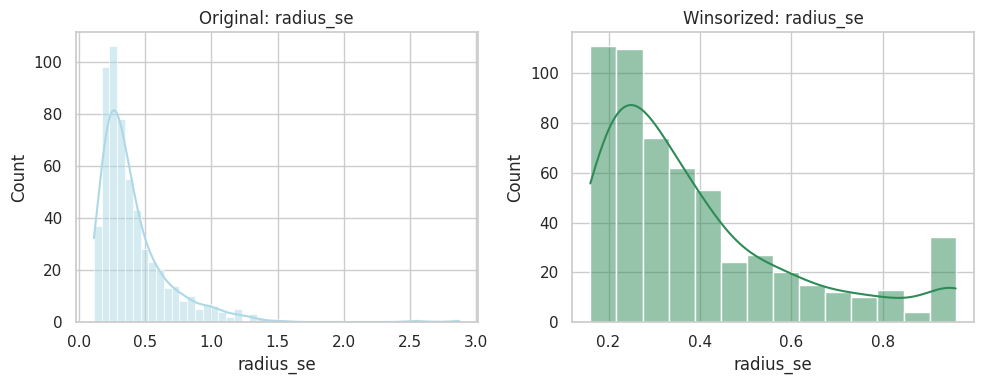

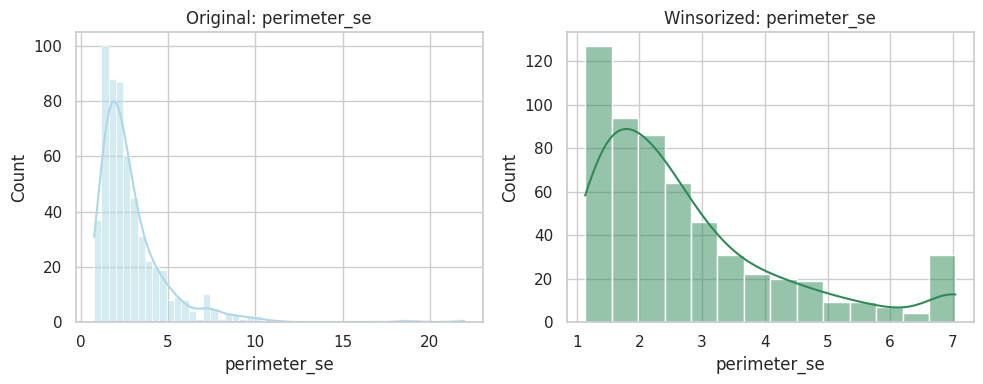

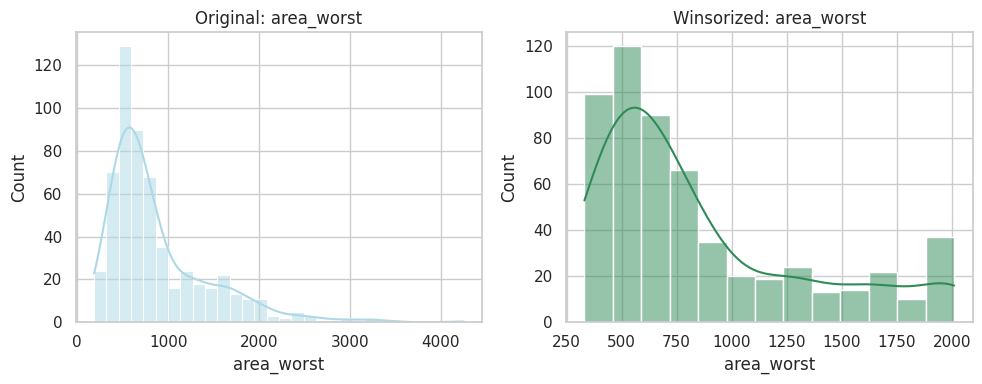

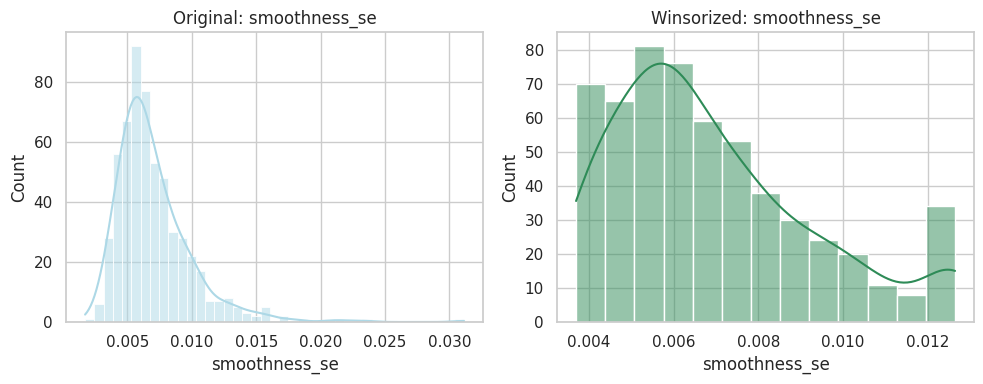

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# The columns to compare
cols_to_compare = ['area_se', 'radius_se', 'perimeter_se', 'area_worst', 'smoothness_se']

for col in cols_to_compare:
    plt.figure(figsize=(10, 4))

    # Histogram of original data
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='lightblue')
    plt.title(f'Original: {col}')

    # Histogram of winsorized data
    plt.subplot(1, 2, 2)
    sns.histplot(df_winsorized[col], kde=True, color='seagreen')
    plt.title(f'Winsorized: {col}')

    plt.tight_layout()
    plt.show()

<ipython-input-7-498896c12a83>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melted_df, x='Dataset', y='Value', palette=['lightblue', 'seagreen'])


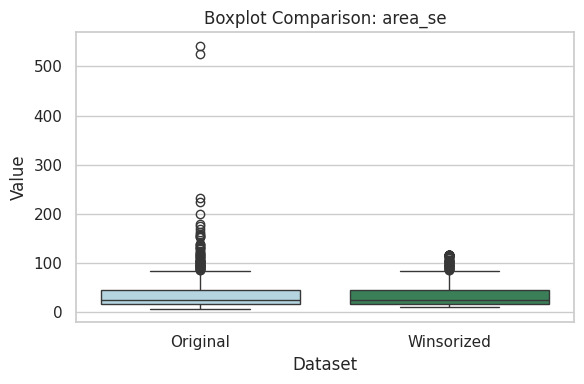

<ipython-input-7-498896c12a83>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melted_df, x='Dataset', y='Value', palette=['lightblue', 'seagreen'])


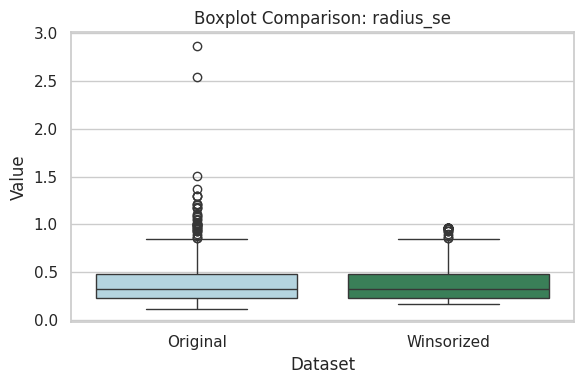

<ipython-input-7-498896c12a83>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melted_df, x='Dataset', y='Value', palette=['lightblue', 'seagreen'])


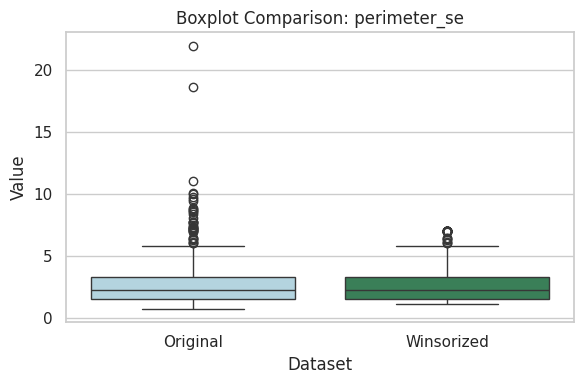

<ipython-input-7-498896c12a83>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melted_df, x='Dataset', y='Value', palette=['lightblue', 'seagreen'])


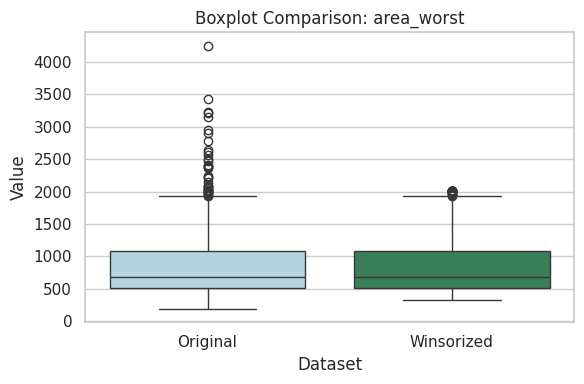

<ipython-input-7-498896c12a83>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melted_df, x='Dataset', y='Value', palette=['lightblue', 'seagreen'])


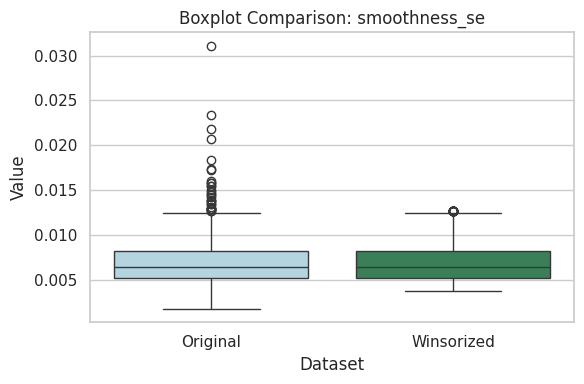

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to be compared
cols_to_compare = ['area_se', 'radius_se', 'perimeter_se', 'area_worst', 'smoothness_se']

for col in cols_to_compare:
    # Include two datasets
    compare_df = pd.DataFrame({
        'Original': df[col],
        'Winsorized': df_winsorized[col]
    })

    # For seaborn
    melted_df = compare_df.melt(var_name='Dataset', value_name='Value')

    # Boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=melted_df, x='Dataset', y='Value', palette=['lightblue', 'seagreen'])
    plt.title(f'Boxplot Comparison: {col}')
    plt.tight_layout()
    plt.show()


We saw how the data got closer to the average value after Winsorizing. This will help us obtain more accurate data while processing the ML models in the ongoing process.

## 1.4. Calculate correlation coefficients (e.g., Pearson correlation) between features and the target.

🔝 Features most correlated with target:

perimeter_worst         0.815182
concave points_mean     0.807060
concave points_worst    0.806724
radius_worst            0.805303
area_worst              0.790729
Name: diagnosis_encoded, dtype: float64

🔻 Features most negatively correlated with target:

id                        0.075426
fractal_dimension_mean    0.002939
texture_se               -0.000324
symmetry_se              -0.071169
smoothness_se            -0.079320
Name: diagnosis_encoded, dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


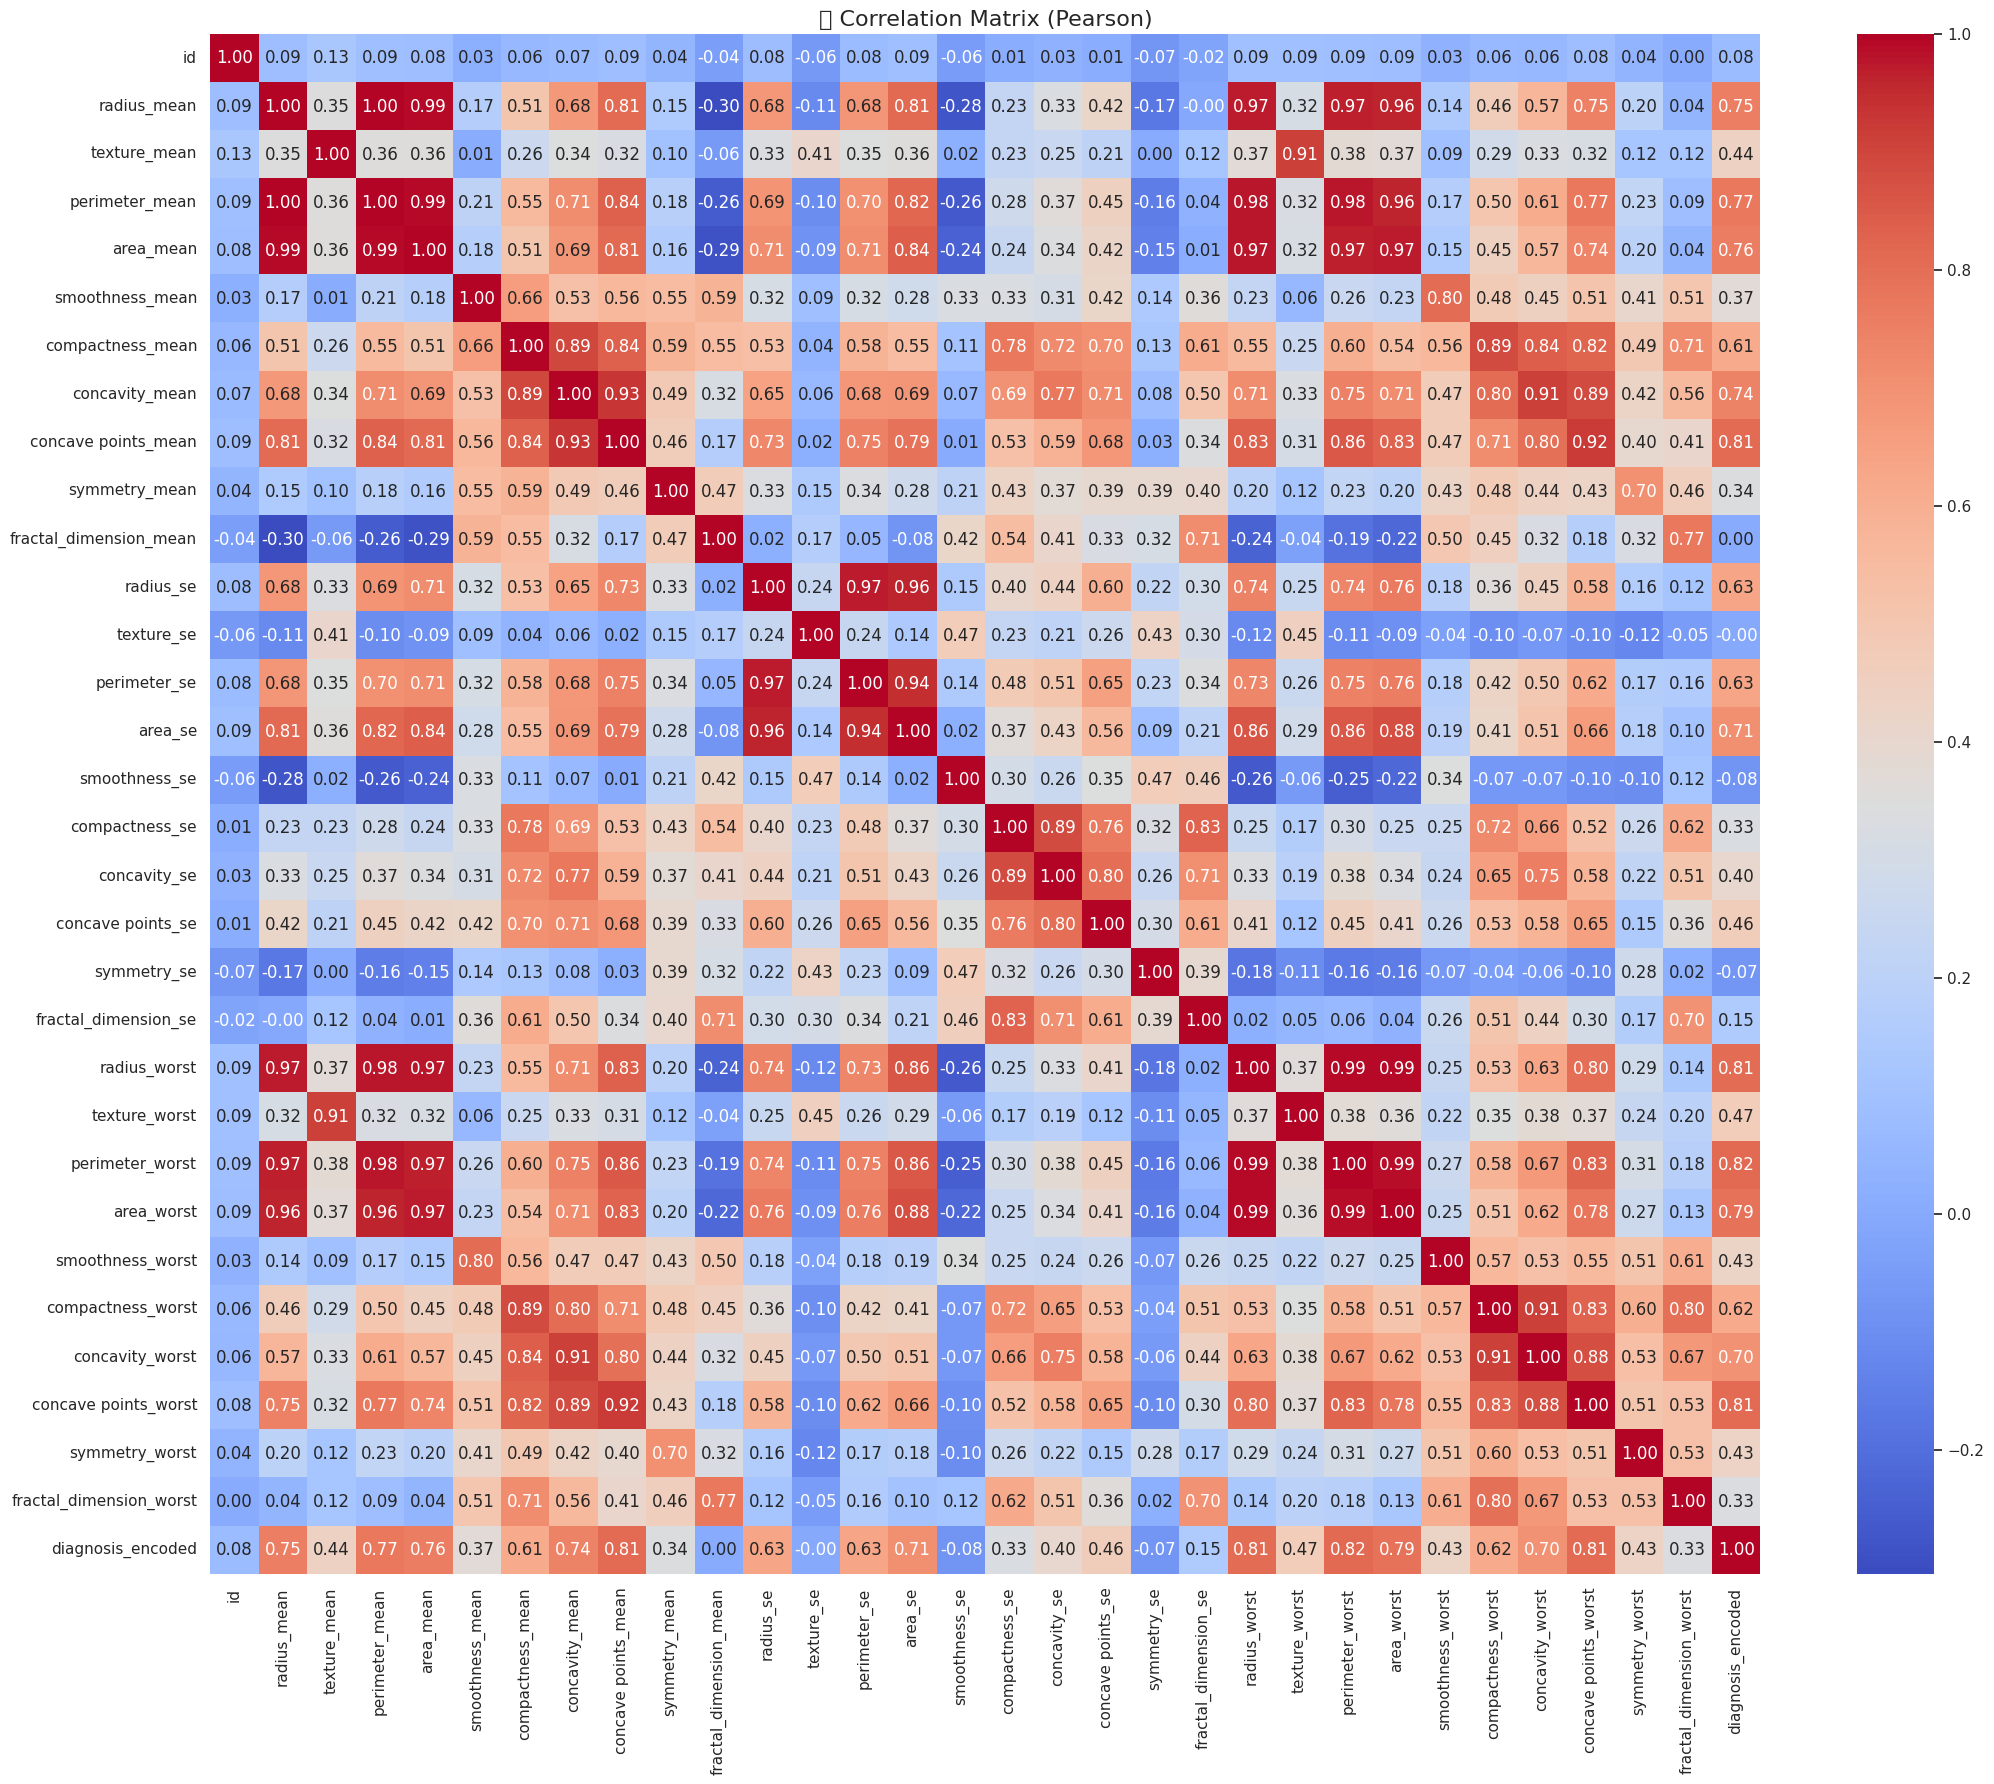

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Encode target: M (malignant) -> 1, B (benign) -> 0
df_winsorized['diagnosis_encoded'] = df_winsorized['diagnosis'].map({'M': 1, 'B': 0})

# Correlation matrix
correlation_matrix = df_winsorized.corr(numeric_only=True)

# The correlation related to target variable
target_corr = correlation_matrix['diagnosis_encoded'].drop('diagnosis_encoded')

# Sort according to the correlation value
target_corr_sorted = target_corr.sort_values(ascending=False)

# Features with highest correlation
print("🔝 Features most correlated with target:\n")
print(target_corr_sorted.head())

# Features with negative correlation
print("\n🔻 Features most negatively correlated with target:\n")
print(target_corr_sorted.tail())

plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('📊 Correlation Matrix (Pearson)', fontsize=16)
plt.show()


<ipython-input-9-b191efc264bd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr_sorted.values, y=target_corr_sorted.index, palette='coolwarm')


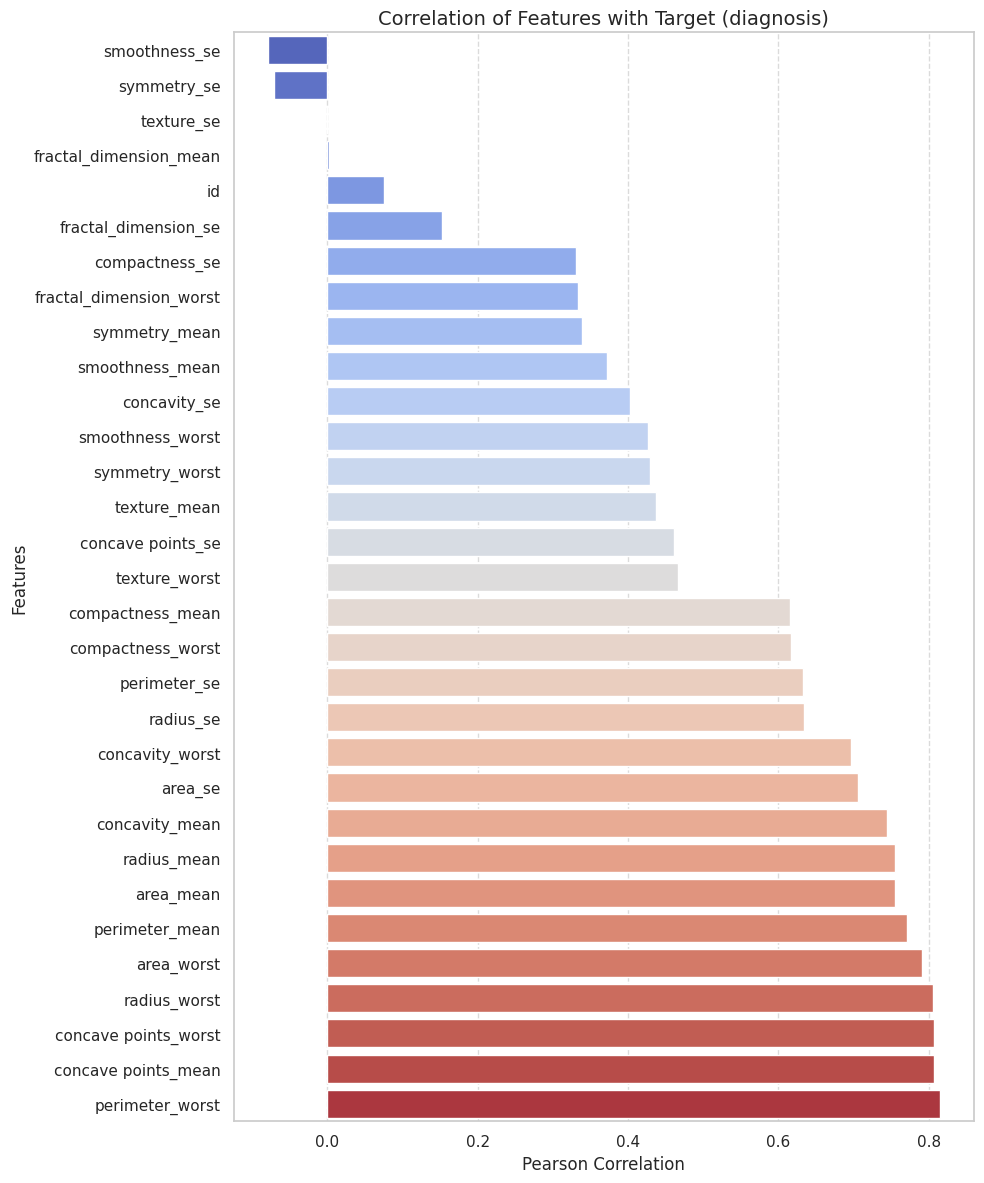

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlations
correlation_matrix = df_winsorized.corr(numeric_only=True)

# Correlation witht the target variable
target_corr = correlation_matrix['diagnosis_encoded'].drop('diagnosis_encoded')

# Sort correlations from smallest to largest, the strongest will be at the bottom
target_corr_sorted = target_corr.sort_values(ascending=True)

# Barplot çizimi
plt.figure(figsize=(10, 12))
sns.barplot(x=target_corr_sorted.values, y=target_corr_sorted.index, palette='coolwarm')
plt.title('Correlation of Features with Target (diagnosis)', fontsize=14)
plt.xlabel('Pearson Correlation')
plt.ylabel('Features')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

If 0 < r < 1, it is positive correlation: As the feature value increases, diagnosis_encoded also increases. So there is a direct correlation between this feature and malignant tumor.

Example: area_mean r = +0.76 → the larger the area, the more likely it is malignant.

If -1 < r < 0, it is negative correlation: As the value increases, the value of diagnosis_encoded decreases. So there is an inverse relationship between the feature and malignant tumor. However there is a direct correlation with bening tumor and the likelihood of being benign may be increasing as the feature values increase.

Example: smoothness_se r = -0.08 → the higher the smoothness, the more likely it is benign.

The closer the correlation is to 1, the stronger the feature is in predicting a malignant tumor. As the correlation approaches to negative values, the feature becomes weak in predicting the target.

In [ ]:
# Only use numerical features (exclude the target column)
numerical_features = df_winsorized.drop(columns=['diagnosis_encoded', 'diagnosis'], errors='ignore')

# Compute correlation matrix
feature_corr = numerical_features.corr().abs()  # absolute value for strength only

# Create a mask to ignore self-correlations and duplicate pairs
mask = np.triu(np.ones_like(feature_corr, dtype=bool))

# Filter for feature pairs with high correlation
threshold = 0.85  # or 0.9 if you want to be stricter
high_corr_pairs = (
    feature_corr.where(mask)
    .stack()
    .reset_index()
    .rename(columns={0: 'Correlation', 'level_0': 'Feature 1', 'level_1': 'Feature 2'})
    .sort_values(by='Correlation', ascending=False)
)

# Show the most strongly correlated feature pairs
print("🔍 Strongly correlated feature pairs (possibly redundant):\n")
print(high_corr_pairs[high_corr_pairs['Correlation'] >= threshold])

🔍 Strongly correlated feature pairs (possibly redundant):

                   Feature 1                Feature 2  Correlation
493           symmetry_worst           symmetry_worst     1.000000
495  fractal_dimension_worst  fractal_dimension_worst     1.000000
418              symmetry_se              symmetry_se     1.000000
430     fractal_dimension_se     fractal_dimension_se     1.000000
405        concave points_se        concave points_se     1.000000
..                       ...                      ...          ...
353                  area_se               area_worst     0.882526
487          concavity_worst     concave points_worst     0.882094
350                  area_se             radius_worst     0.858445
352                  area_se          perimeter_worst     0.856667
235      concave points_mean          perimeter_worst     0.855791

[63 rows x 3 columns]


We notice that some columns exhibit nearly identical characteristics. While this could negatively impact the reliability of the model in ongoing processes, we must remember that we are working with medical data, where each column holds significant importance. Therefore, we will not remove any columns that share similar characteristics.

* area_se vs area_worst
* concavity_worst vs concave points_worst
* area_se vs radius_worst
* area_se vs perimeter_worst
* concave points_mean vs perimeter_worst

# 2. Data Preparation:

## 2.1. Assign the diagnosis column as the target variable:


In [ ]:
X = df_winsorized.drop('diagnosis', axis=1)
y = df_winsorized['diagnosis'].map({'B': 0, 'M': 1})

# Show class distribution
print("🔍 Class Distribution (0 = Benign, 1 = Malignant):\n")
print(y.value_counts())

🔍 Class Distribution (0 = Benign, 1 = Malignant):

diagnosis
0    357
1    212
Name: count, dtype: int64


So in the data set there are:
* 357 benign (labelled 0),
* 212 malignant specimens (labelled 1).

This makes a total of 569 instances. There is class imbalance, but it is not very serious. When evaluating model performance in the future, not only accuracy, but especially these metrics will be also evaluated:
* Precision
* Recall
* F1-Score

## 2.2. Identify any missing values:


In [ ]:
print(df_winsorized.isnull().sum())
print("Any missing values?:", df_winsorized.isnull().values.any())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis_encoded          0
dtype: int64
Any missing values?: False


Since the missing value output takes the value 0 for each column, we do not need to do anything more about it.

## 2.3. Spliting the data set and applying standard scaler

After performing Winsorizing and Standard Scaling, we should use the defined variables df_scaled_all and df_winsorized when training the model.

Prepare the target variable (in its original form without data loss):
y = df_winsorized['diagnosis'].map({'B': 0, 'M': 1})

Use the standardized data as features:
X = df_scaled_all

An example of model training:
model.fit(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

x = df_winsorized.drop(['diagnosis', 'diagnosis_encoded'], axis=1, errors='ignore')
y = df_winsorized['diagnosis_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
num_features_for_scaling = X_train.select_dtypes(include=np.number).columns # scaling için sayısal sütunlar kullanılır
X_train[num_features_for_scaling] = scaler.fit_transform(X_train[num_features_for_scaling])
X_test[num_features_for_scaling] = scaler.transform(X_test[num_features_for_scaling])

The parameter test_size=0.2 determines what percentage of the dataset will be allocated as test data. Setting test_size=0.2 means that 80% of the data will be used for training, and 20% will be used for testing.

This split ratio is a common standard because it provides sufficient data for the model to learn (80%).And it leaves enough data to evaluate the model’s generalization performance (20%).

The random_state=42 parameter is used to fix the randomness in the data splitting process.This ensures that the data is split in the same way every time the code is run, which is crucial for reproducibility, especially when comparing models later on.
Technically, any integer could be used, but "42" has become a humorous "default value" among programmers — a reference to The Hitchhiker’s Guide to the Galaxy, in which 42 is the “answer to life, the universe, and everything.”

# 3. Model Training

In the following, algorithms that may be suitable for model testing are selected:
* Logistic Regression,
* Support Vector Machine,
* Decision Tree,
* Random Forest,
* K-Nearest Neighbors

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Support Vector Machine
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

models = {
    'Logistic Regression': logreg_model,
    'SVM': svm_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'KNN': knn_model
}

print(logreg_model.get_params())
print(svm_model.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


# 4. Model Evaluation

## 4.1. Evaluate each model on the test set using accuracy, precision, recall, F1-score, and AUC.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd

def evaluate_models(models, X_test, y_test):
    results = []

    for name, model in models.items():
        y_pred = model.predict(X_test)

        # Some models use probability for ROC AUC, others uses decision function.
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            # for SVM
            y_proba = model.decision_function(X_test)

        results.append({
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1-Score': f1_score(y_test, y_pred),
            'ROC AUC': roc_auc_score(y_test, y_proba)
        })

    return pd.DataFrame(results).sort_values(by='F1-Score', ascending=False)

results_df = evaluate_models(models, X_test, y_test)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  Logistic Regression  0.982456   1.000000  0.952381  0.975610  0.996362
1                  SVM  0.973684   0.975610  0.952381  0.963855  0.995701
3        Random Forest  0.973684   1.000000  0.928571  0.962963  0.993882
2        Decision Tree  0.938596   0.948718  0.880952  0.913580  0.926587
4                  KNN  0.938596   0.972973  0.857143  0.911392  0.969577


According to these results, the best performing model is the most balanced and high performance Logistic Regression with Accuracy (98%), Precision (100%), F1-Score (98%), and ROC AUC (0.996).
Then SVM gives very strong results with an AUC value of 0.996. Ranom Forest gives similarly low error results.
Decision Tree and KNN are slightly weaker, especially in Recall rates. This means that they make more errors when predicting the positive class.

## 4.2. Present results in a clear table or multiple plots (e.g., confusion matrix, ROC curve)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

def plot_model_performance(models, X_test, y_test):
    num_models = len(models)
    fig, axes = plt.subplots(num_models, 2, figsize=(12, 5 * num_models))

    if num_models == 1:
        axes = [axes]

    for i, (name, model) in enumerate(models.items()):
        y_pred = model.predict(X_test)

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i][0])
        axes[i][0].set_title(f"{name} - Confusion Matrix")
        axes[i][0].set_xlabel("Predicted")
        axes[i][0].set_ylabel("Actual")

        # ROC Curve
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_test)[:, 1]
        else:
            y_scores = model.decision_function(X_test)

        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)

        axes[i][1].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
        axes[i][1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        axes[i][1].set_xlim([0.0, 1.0])
        axes[i][1].set_ylim([0.0, 1.05])
        axes[i][1].set_xlabel('False Positive Rate')
        axes[i][1].set_ylabel('True Positive Rate')
        axes[i][1].set_title(f"{name} - ROC Curve")
        axes[i][1].legend(loc="lower right")

    plt.tight_layout()
    plt.show()

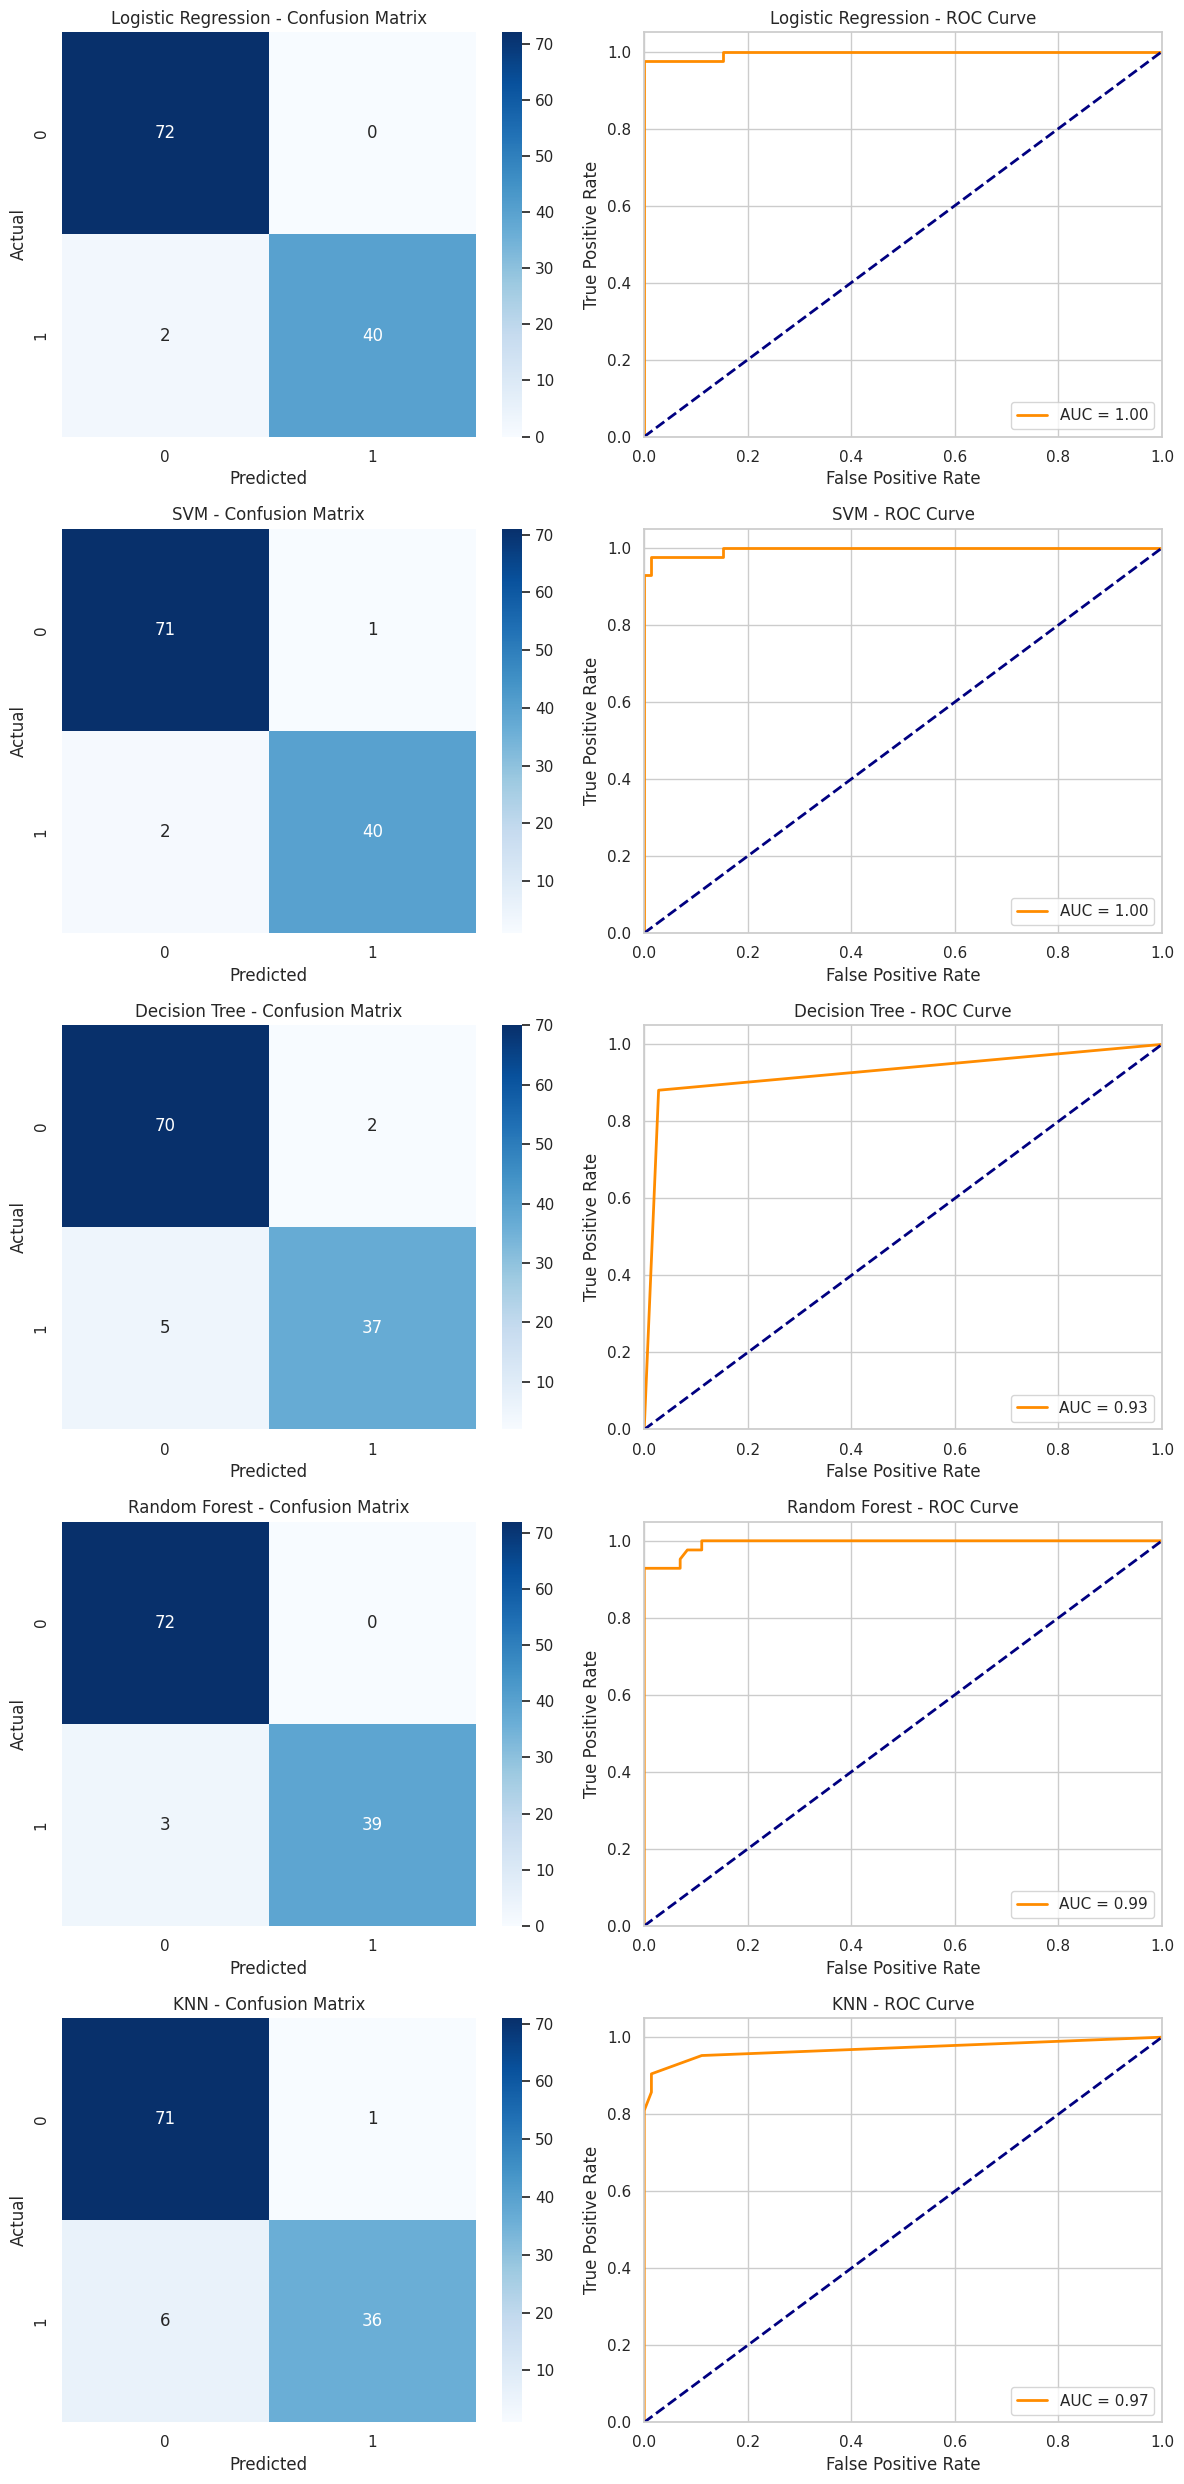

In [ ]:
plot_model_performance(models, X_test, y_test)

## 4.3. Discuss which model performed best and why (based on metrics)

    Number       Model      Accuracy  Precision    Recall  F1-Score   ROC AUC
    
    0  Logistic Regression  0.982456   1.000000  0.952381  0.975610  0.996362
    1                  SVM  0.973684   0.975610  0.952381  0.963855  0.995701
    3        Random Forest  0.973684   1.000000  0.928571  0.962963  0.993882
    2        Decision Tree  0.938596   0.948718  0.880952  0.913580  0.926587
    4                  KNN  0.938596   0.972973  0.857143  0.911392  0.969577

## 4.4. Select the top-performing model(s) for further fine-tuning (e.g., using GridSearchCV or RandomizedSearchCV).


Logistic regression had produced the best results according to the table above. Therefore, GridSearchCV will be used to further optimize this model.

The key hyperparameters for LogisticRegression are as follows:
Parameter	Description
* C:	Regularization strength (a lower value of C means stronger regularization)
* penalty:	Type of regularization to be applied (l1, l2, elasticnet, or none)
* solver:	Optimization algorithm used (liblinear, saga, lbfgs, etc.)



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Model description
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']  # 'saga' ile l1 de eklenebilir
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Training the model
grid_search.fit(X_train, y_train)

# Best parameters and their scores
print("Best parameters:", grid_search.best_params_)
print("The Best F1 score:", grid_search.best_score_)

# Performance of the test with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
The Best F1 score: 0.9701293471832084
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



The code above performs the following:
* Uses 5-fold cross-validation to find the best combination of C, penalty, and solver.
* Evaluates the model based on the F1-score.
* Reports the performance on the test set using the best model.

Evaluation:
* Precision increased from 0.96 to 1.00, indicating an improvement in the correctness of positive predictions.
* Recall dropped from 1.00 to 0.93, but the higher precision is still considered beneficial.
* F1-score slightly decreased from 0.98 to 0.96, which is an overall balance metric.
* Accuracy improved to 0.97, indicating better overall performance.


In conclusion, the model performs in a very balanced way. Recall slightly decreased for class 1, but precision is high. The number of misclassifications is very low.

## 4.5. Compare pre- vs. post-tuning performance to show improvements

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# 1. Default model (the name of previously trained model: logreg_model)
y_pred_default = logreg_model.predict(X_test)
y_proba_default = logreg_model.predict_proba(X_test)[:, 1]

# 2. Tuned model (best model after GridSearchCV)
best_log_reg = grid_search.best_estimator_
y_pred_tuned = best_log_reg.predict(X_test)
y_proba_tuned = best_log_reg.predict_proba(X_test)[:, 1]

# 3. Calculating the metrics
def get_metrics(y_true, y_pred, y_proba):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_proba)
    }

metrics_default = get_metrics(y_test, y_pred_default, y_proba_default)
metrics_tuned = get_metrics(y_test, y_pred_tuned, y_proba_tuned)

# 4. Compare as DataFrame
comparison_df = pd.DataFrame({
    "Default Model": metrics_default,
    "Tuned Model": metrics_tuned
})

print("🔍 Logistic Regression – Pre vs. Post Tuning Performance:\n")
print(comparison_df.round(4))

🔍 Logistic Regression – Pre vs. Post Tuning Performance:

           Default Model  Tuned Model
Accuracy          0.9825       0.9737
Precision         1.0000       1.0000
Recall            0.9524       0.9286
F1-score          0.9756       0.9630
AUC               0.9964       0.9957


**Evaluation Comments:**

* Accuracy: The default model classified the test set with 98.25% accuracy, while the tuned model achieved 97.37%. There is a slight drop in accuracy after hyperparameter tuning.

* Precision: Both models achieved 100% precision, meaning all positive predictions were correct. The model is extremely precise in identifying positive cases.

* Recall: The default model captured 95.24% of the positive cases, while the tuned model captured 92.86%. A slight decrease in recall was observed after tuning.

* F1-score: Reflecting the balance between precision and recall, the default model scored 0.9756, and the tuned model scored 0.9630. Again, a small drop is seen after tuning.

* AUC (Area Under the ROC Curve): Both models achieved an AUC of around 99.6%, indicating excellent and nearly identical classification performance.

**Overall Assessment:**
After hyperparameter tuning with GridSearchCV, the model showed slightly lower performance in some metrics (accuracy, recall, F1-score), while precision remained perfect and AUC remained nearly unchanged. This may be due to changes in the balance of the model, variations in parameter combinations, or effects related to overfitting or underfitting.

The default model seems to have delivered slightly better overall performance on the test set. However, the tuned model may have reduced the risk of overfitting, trading a small amount of performance for greater generalization stability.